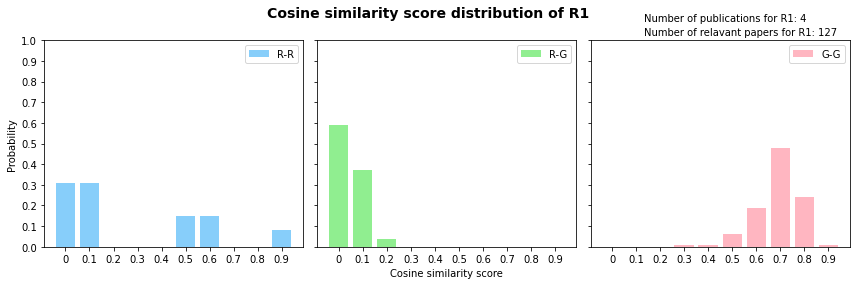

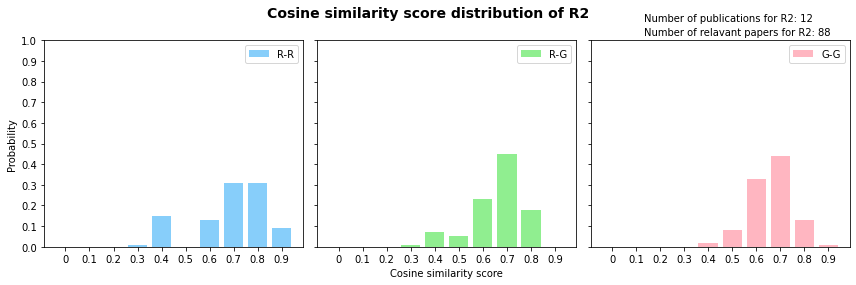

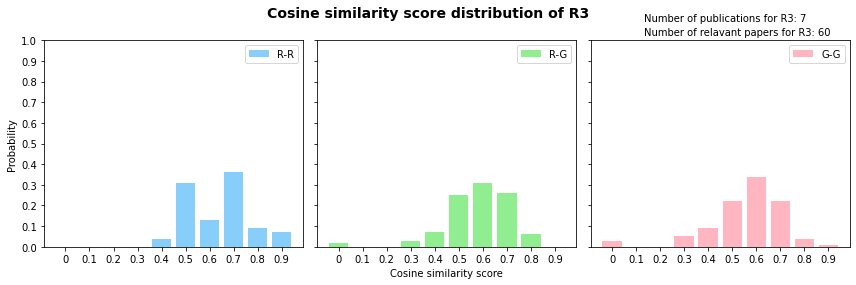

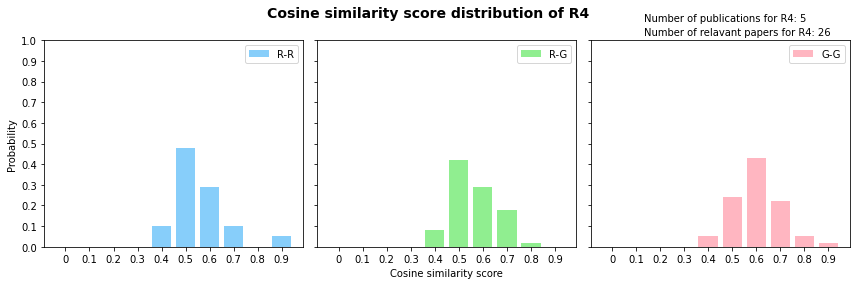

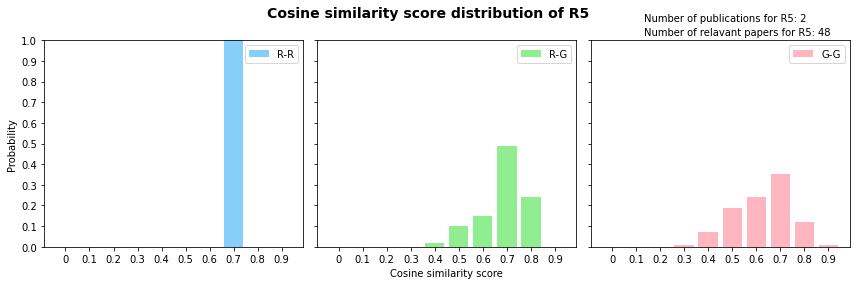

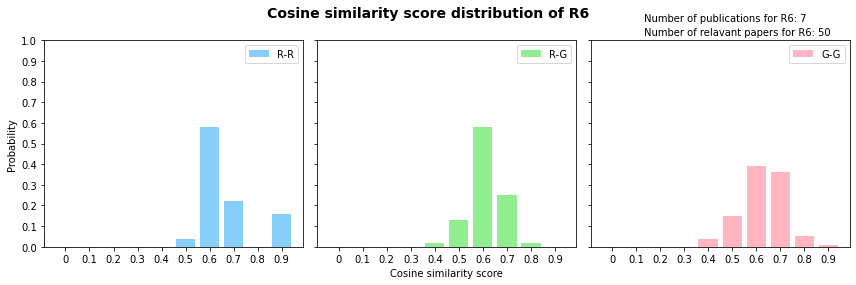

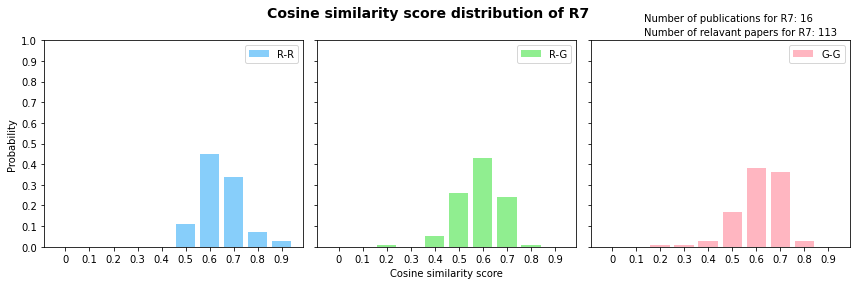

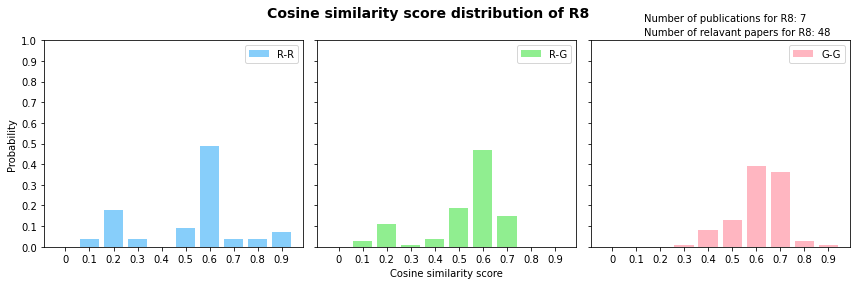

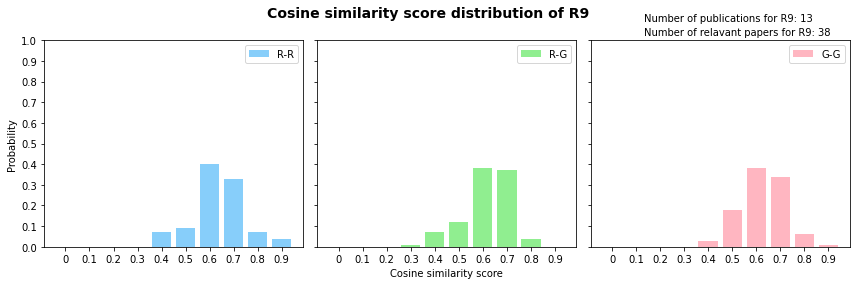

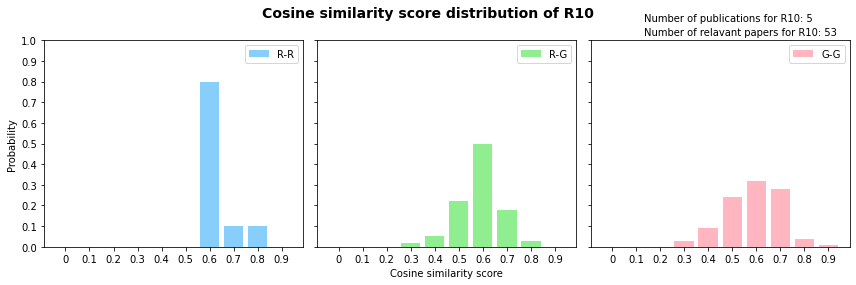

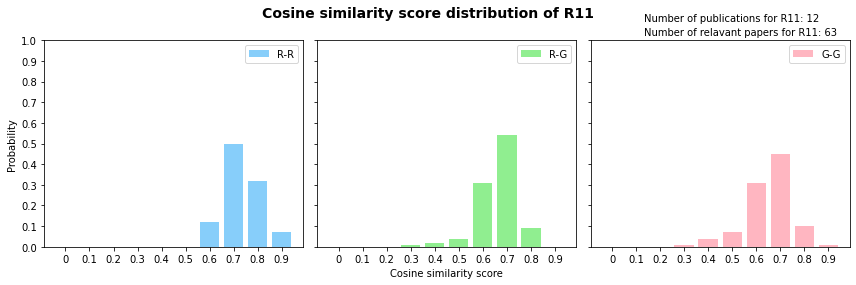

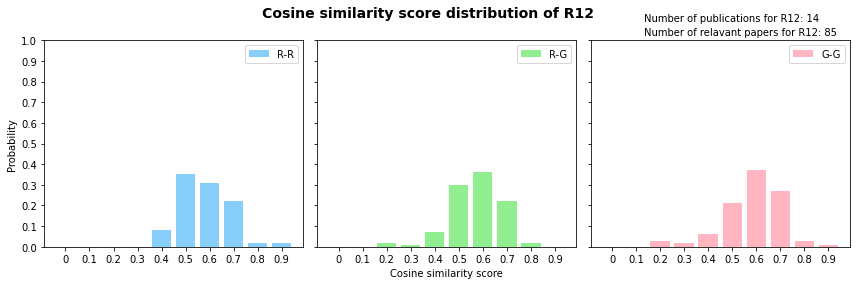

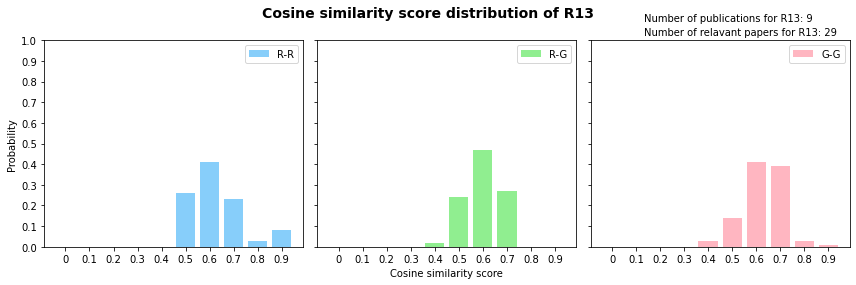

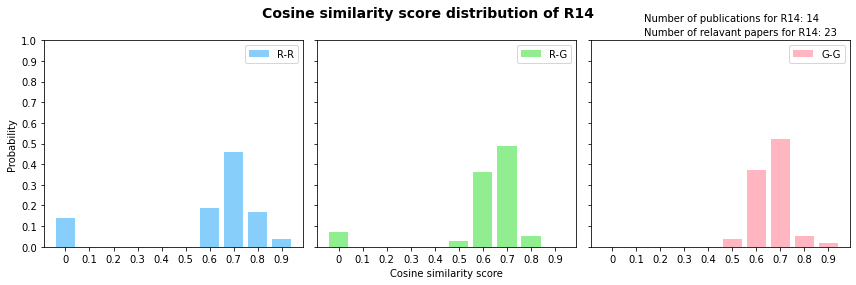

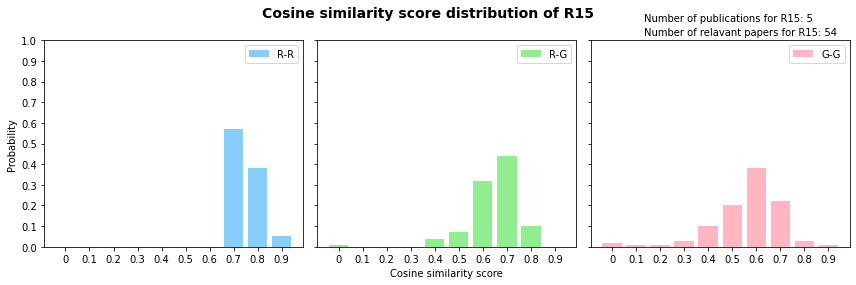

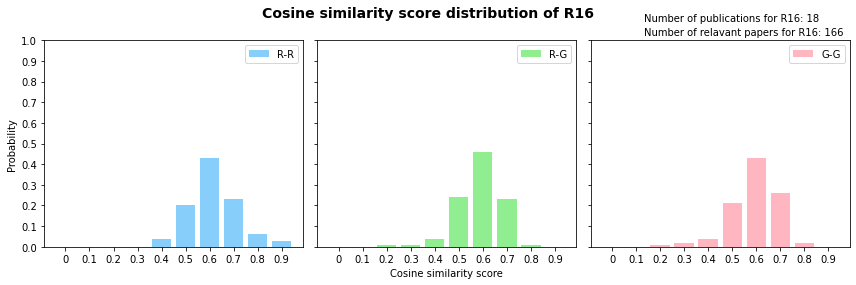

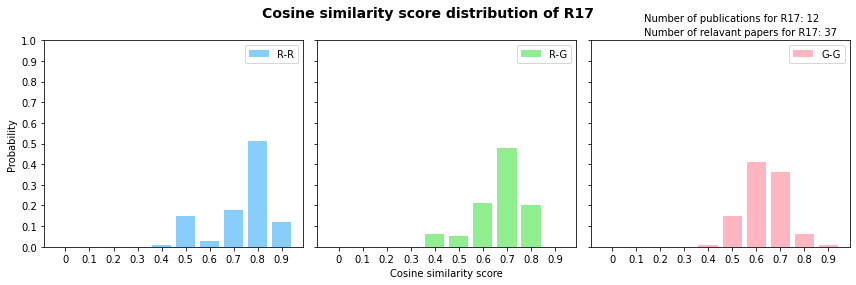

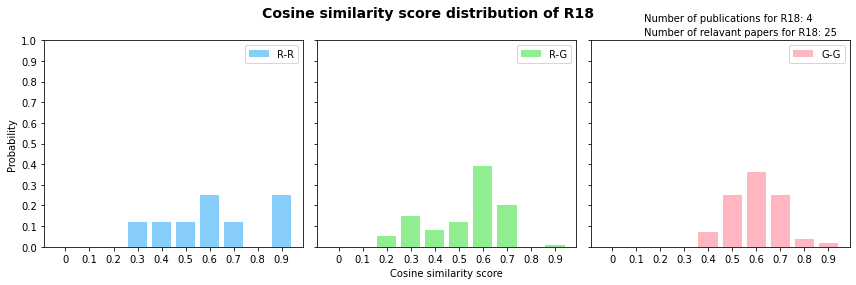

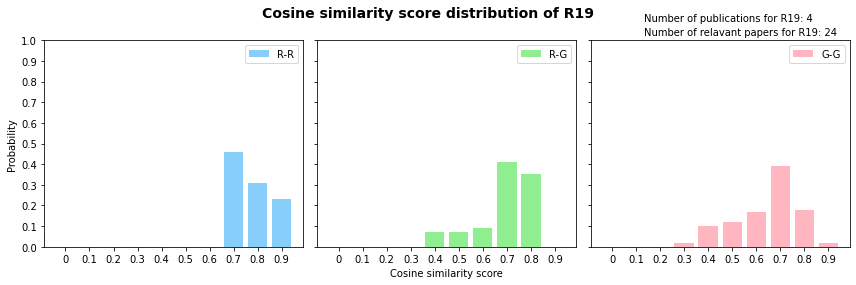

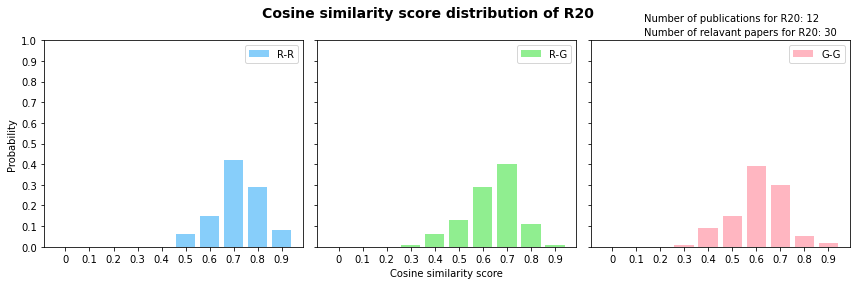

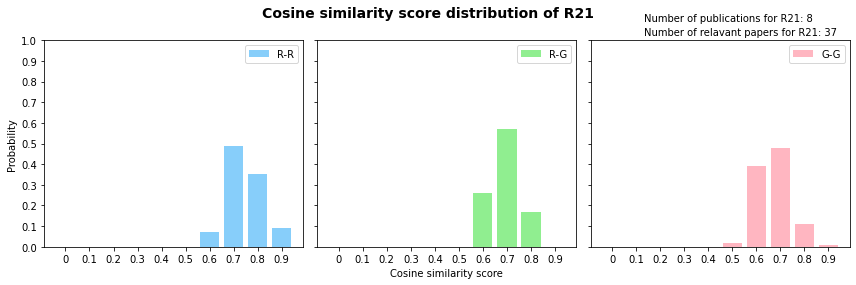

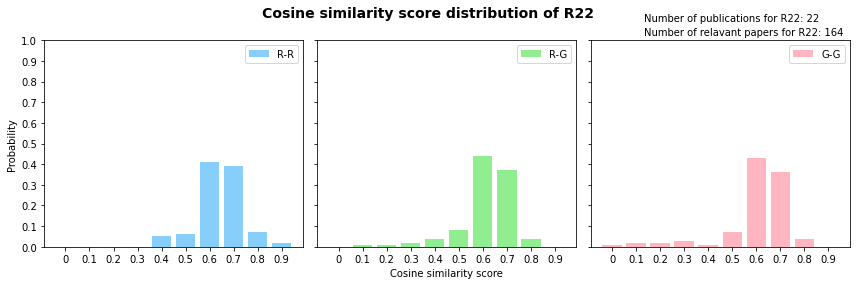

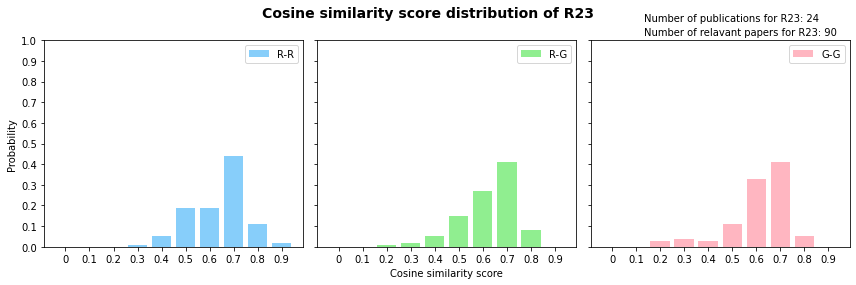

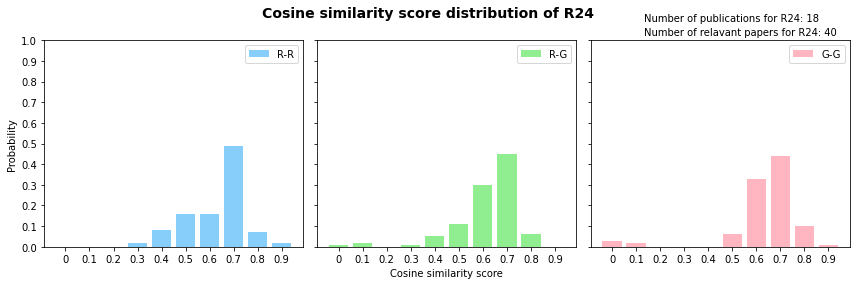

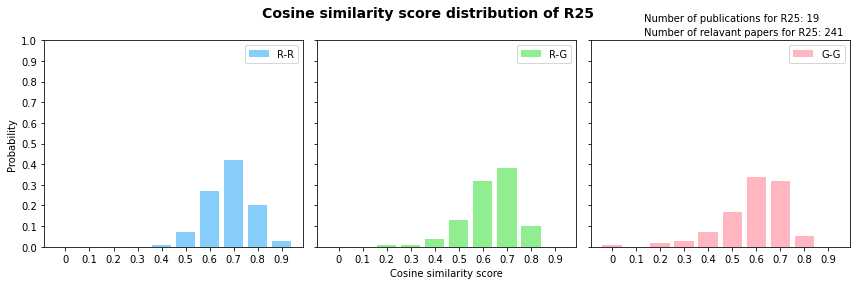

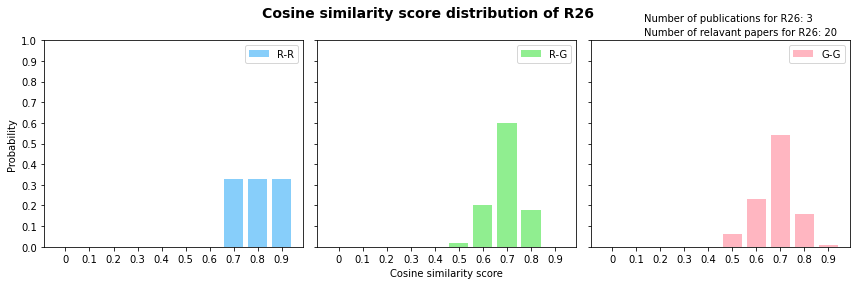

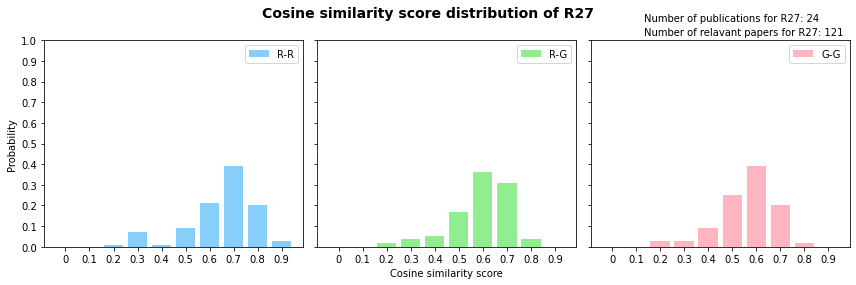

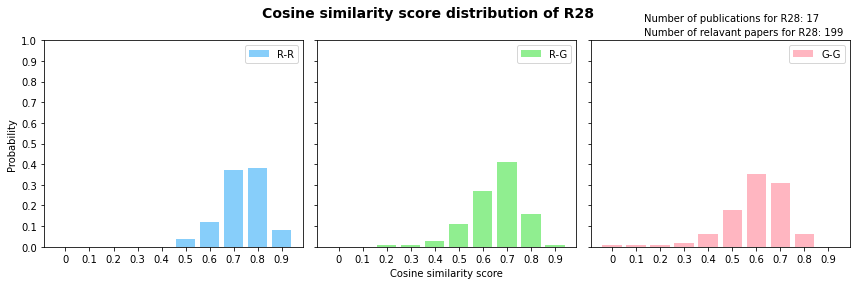

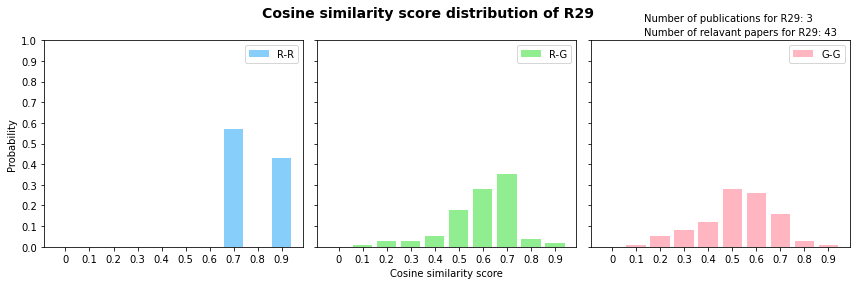

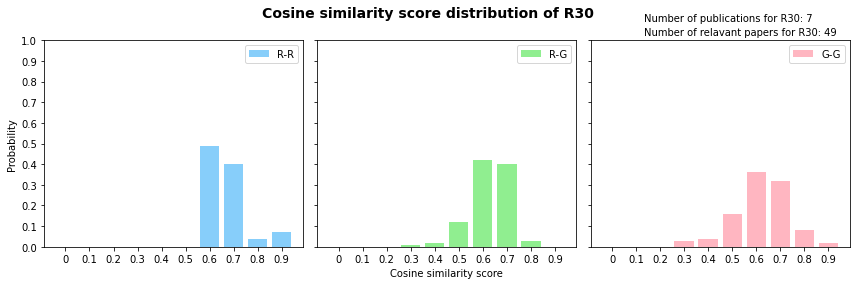

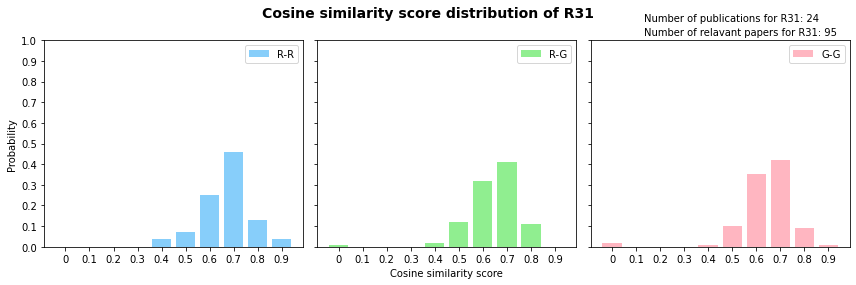

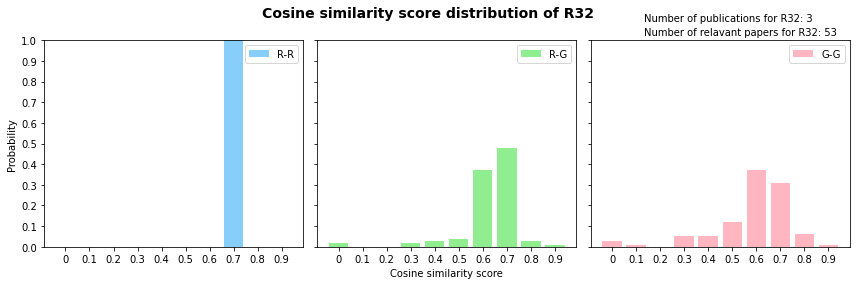

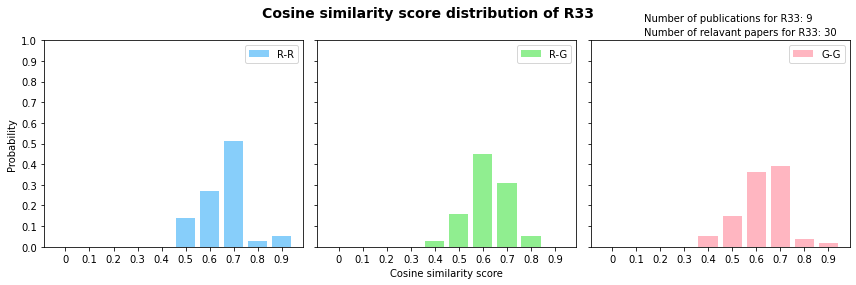

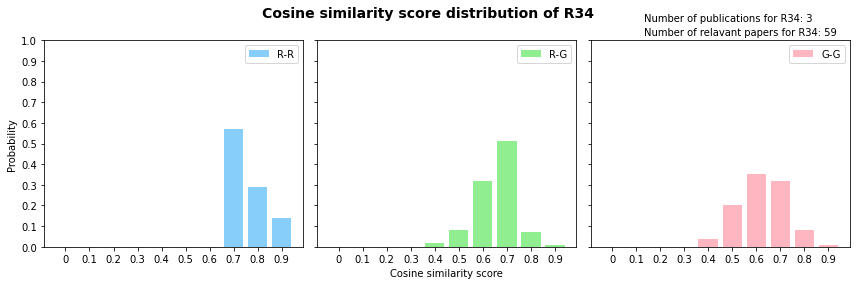

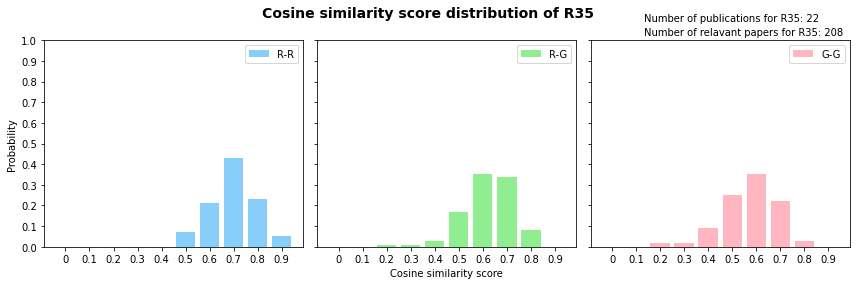

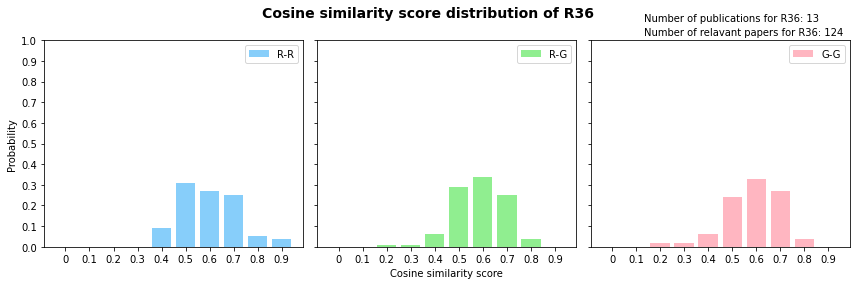

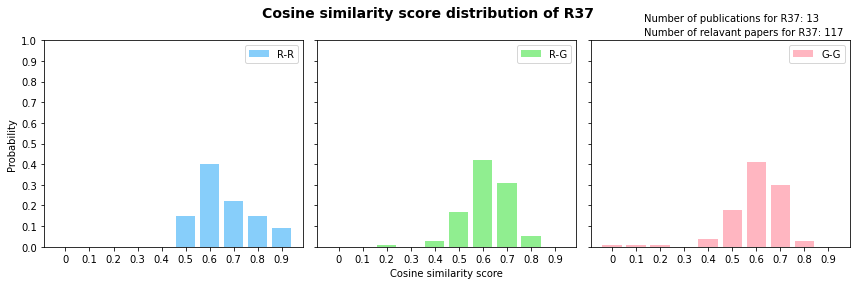

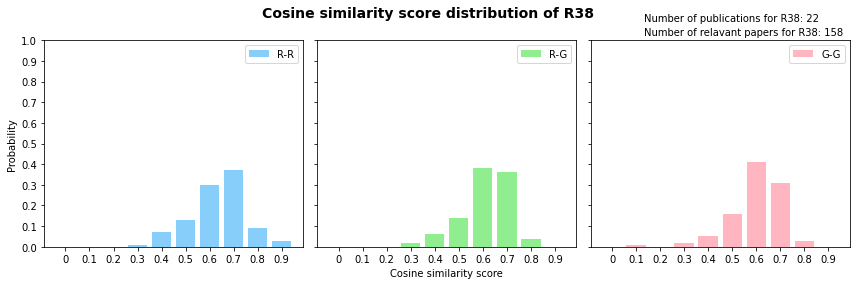

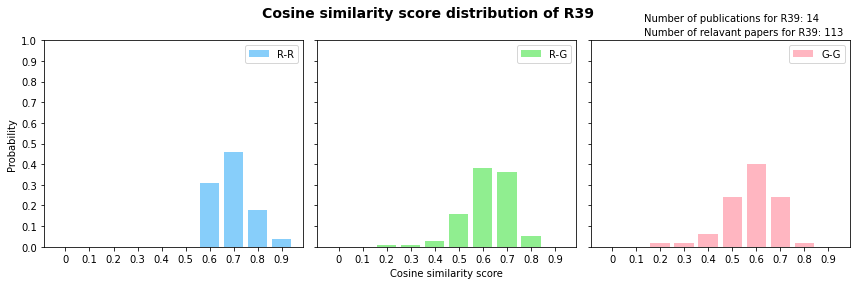

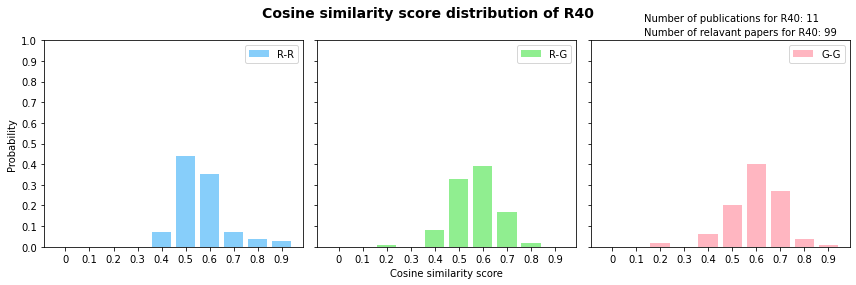

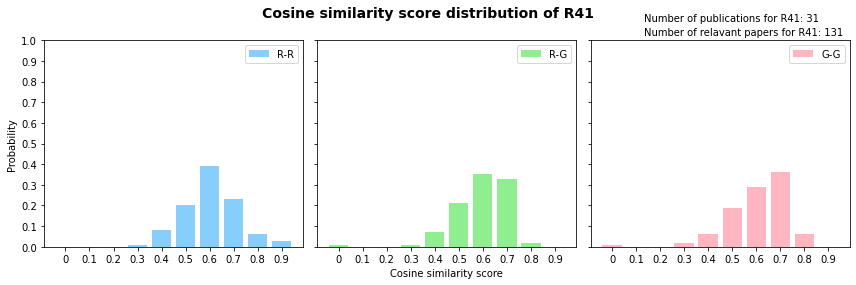

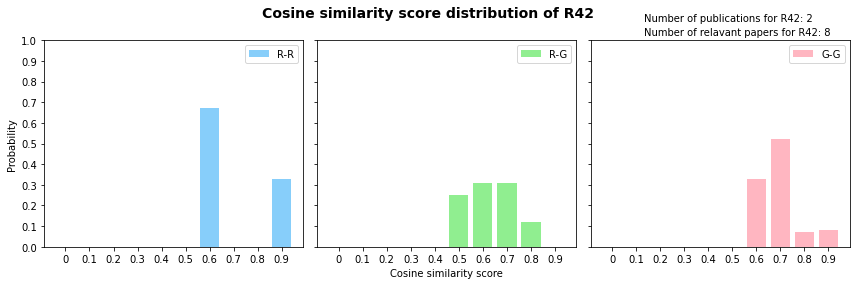

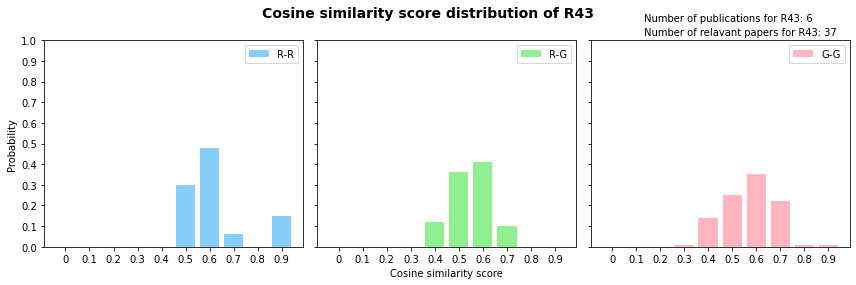

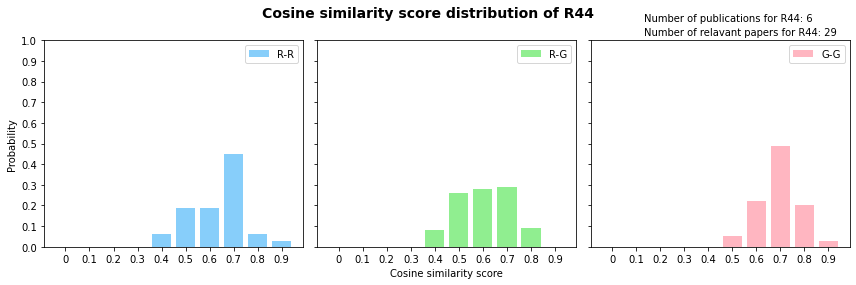

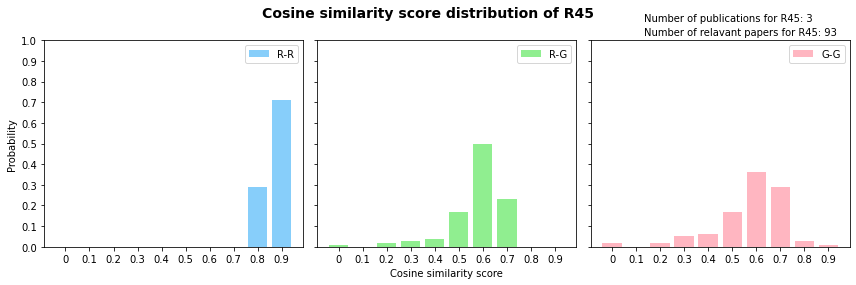

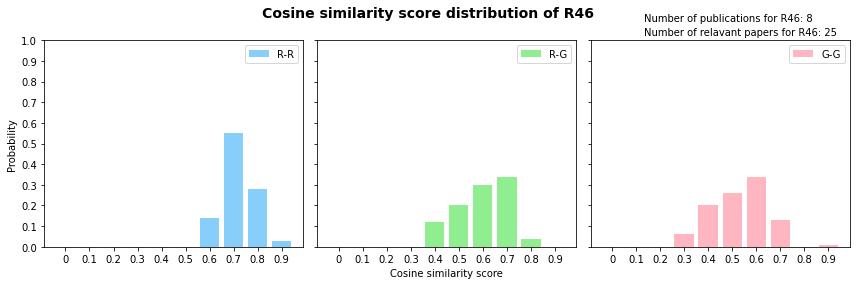

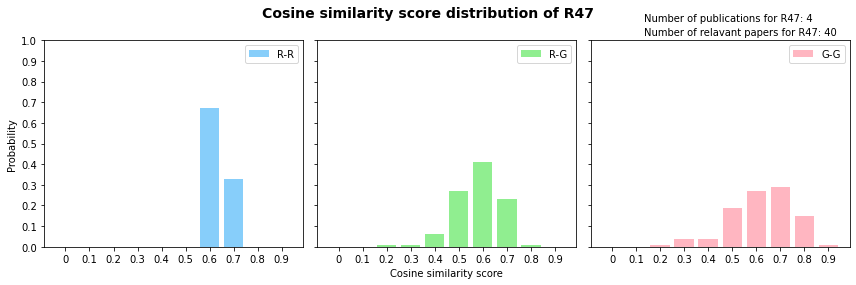

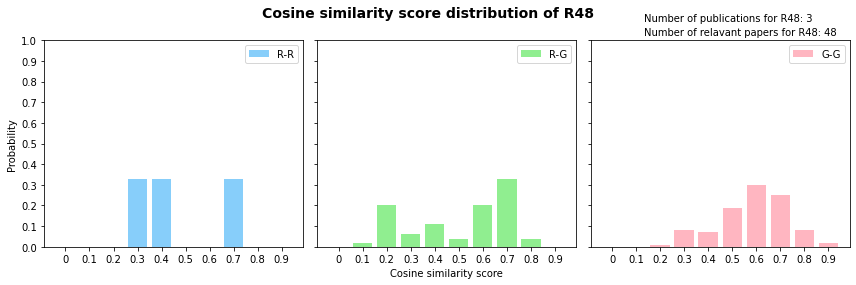

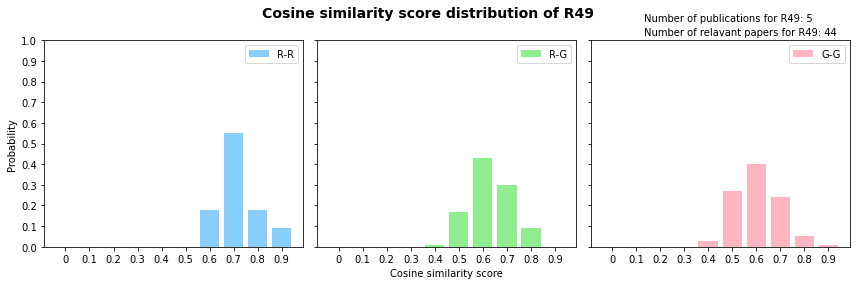

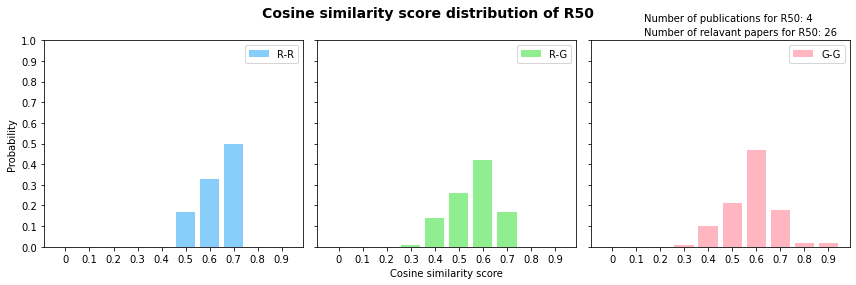

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plotting cosine similarity scores distribution for each researcher
# r-r: cosine(researcher's publication1, researcher's publication2)
# r-g: cosine(researcher's publication1, researcher's relavant paper1)
# g-g: cosine(researcher's relavant paper1, researcher's relavant paper2)
for r in range(1,51,1):
    #*****************************
    r_r_df = pd.read_csv('cos/r-r/R{}.csv'.format(r), index_col=0)
    matrix = r_r_df.to_numpy() 
    matrix = matrix.reshape(-1,1)
    # filtering those cosine scores == 1, and missing values NaN
    new_array = np.delete(matrix, np.where(matrix >= 0.9999999999999999))
    new_array = new_array[~np.isnan(new_array)]
    ls = new_array.tolist()
    # get the frequency and percentage of cosine similarity scores by range
    bins = [round(x,1) for x in np.arange(0,1.1,0.1)]
    counts, _ = np.histogram(ls, bins=bins)
    percentage1 = [round(x/np.sum(counts),2) for x in counts]

    #*****************************
    r_g_df = pd.read_csv('cos/r-g/R{}.csv'.format(r), index_col=0)
    matrix = r_g_df.to_numpy() 
    matrix = matrix.reshape(-1,1)
    # filtering those cosine scores == 1, and missing values NaN
    new_array = np.delete(matrix, np.where(matrix >= 1.0))
    new_array = new_array[~np.isnan(new_array)]
    ls = new_array.tolist()
    # get the frequency and percentage of cosine similarity scores by range
    bins = [round(x,1) for x in np.arange(0,1.1,0.1)]
    counts, _ = np.histogram(ls, bins=bins)
    percentage2 = [round(x/np.sum(counts),2) for x in counts]

    #*****************************
    g_g_df = pd.read_csv('cos/g-g/R{}.csv'.format(r), index_col=0)
    matrix = g_g_df.to_numpy() 
    matrix = matrix.reshape(-1,1)
    # filtering those cosine scores == 1, and missing values NaN
    new_array = np.delete(matrix, np.where(matrix >= 1.0))
    new_array = new_array[~np.isnan(new_array)]
    ls = new_array.tolist()
    # get the frequency and percentage of cosine similarity scores by range
    bins = [round(x,1) for x in np.arange(0,1.1,0.1)]
    counts, _ = np.histogram(ls, bins=bins)
    percentage3 = [round(x/np.sum(counts),2) for x in counts]

    users_stats = pd.read_csv('user_profiles_statistics.csv')
    users_stats.columns = ['user', 'n-pub', 'n-rlv']

    #*****************************Create subplots
    X = ['0','0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']
    # Create a figure with three subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
    fig.suptitle('Cosine similarity score distribution of R{}'.format(r), fontsize=14, fontweight='bold')
    fig.text(0.75,0.93,'Number of publications for R{}: {}'.format(r,users_stats['n-pub'][r-1]))
    fig.text(0.75,0.88,'Number of relavant papers for R{}: {}'.format(r,users_stats['n-rlv'][r-1]))


    # color = 0780cf - 765005 - fa6d1d
    bar1 = axes[0].bar(X, percentage1, label='R-R', color='lightskyblue')
    # axes[0].set_xlabel("Cosine similarity score")
    axes[0].set_ylabel("Probability")
    axes[0].set_ylim(0,1)
    axes[0].set_ylim(0, 1)
    axes[0].legend(handles=[bar1])

    bar2 = axes[1].bar(X, percentage2, label='R-G', color='lightgreen')
    axes[1].set_xlabel("Cosine similarity score")
    # axes[1].set_ylabel("Probability")
    axes[1].set_ylim(0,1)
    axes[1].legend(handles=[bar2])

    bar3 = axes[2].bar(X, percentage3, label='G-G', color='lightpink')
    # axes[2].set_xlabel("Cosine similarity score")
    # axes[2].set_ylabel("Probability")
    axes[2].set_ylim(0,1)
    axes[2].legend(handles=[bar3])

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.yticks(np.arange(0, 1.1, 0.1))
    # Save the plot as PNG
    plt.savefig('plots/R{}.jpg'.format(r), bbox_inches = 'tight')

    plt.show()

In [4]:
count = 0
ls = []
users_stats = pd.read_csv('user_profiles_statistics.csv')
users_stats.columns = ['user', 'n-pub', 'n-rlv']
n_pub_ls = []
for r in range(1,51,1):
    path = 'cos/r-r/R{}.csv'.format(r)
    sim_df = pd.read_csv(path, index_col=0)
    # print(sim_df.describe())
    matrix = sim_df.to_numpy() 
    matrix = matrix.reshape(-1,1)
    # filtering those cosine scores == 1, and missing values NaN
    new_array = np.delete(matrix, np.where(matrix >= 1.0))
    new_array = new_array[~np.isnan(new_array)]
    if new_array.min() < 0.4:
        print('R{}: '.format(r),round(new_array.min(),2))
        count += 1
        ls.append(r)
        n_pub_ls.append(users_stats['n-pub'][r-1])
print('Count: ', count)
print('researcher list:\n',ls)
print('publication list for each researcher:\n', n_pub_ls)

R1:  0.05
R2:  0.4
R8:  0.16
R14:  0.0
R18:  0.3
R23:  0.37
R24:  0.34
R27:  0.28
R31:  0.4
R38:  0.35
R41:  0.38
R48:  0.31
Count:  12
researcher list:
 [1, 2, 8, 14, 18, 23, 24, 27, 31, 38, 41, 48]
publcation list for each researcher:
 [5, 12, 7, 14, 4, 24, 18, 24, 24, 22, 31, 3]


In [3]:
sum(n_pub_ls)/len(n_pub_ls)

15.666666666666666